# Artwork Object Detection

## 1. 데이터 생성

In [1]:
import json
import os
import random
from PIL import Image, ImageDraw

# 프로젝트 기반 경로 설정
base_dir = "C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection"
data_dir = os.path.join(base_dir, "data")
os.makedirs(data_dir, exist_ok=True)

# 기본 이미지 생성 함수
def create_artwork_image(filename, shapes):
    image = Image.new("RGB", (500, 500), color="white")
    draw = ImageDraw.Draw(image)
    for shape in shapes:
        if shape["label"] == "rectangle":
            draw.rectangle(shape["bbox"], outline="blue", width=3)
        elif shape["label"] == "circle":
            x0, y0, x1, y1 = shape["bbox"]
            draw.ellipse((x0, y0, x1, y1), outline="red", width=3)
    image.save(filename)

# 랜덤 이미지 생성 함수
def create_random_images(output_dir, num_images=10):
    os.makedirs(output_dir, exist_ok=True)
    for i in range(1, num_images + 1):
        img = Image.new("RGB", (500, 500), color="white")
        draw = ImageDraw.Draw(img)
        for _ in range(random.randint(1, 5)):
            shape_type = random.choice(["rectangle", "circle"])
            x0, y0 = random.randint(50, 400), random.randint(50, 400)
            x1, y1 = x0 + random.randint(50, 100), y0 + random.randint(50, 100)
            if shape_type == "rectangle":
                draw.rectangle([x0, y0, x1, y1], outline="blue", width=3)
            elif shape_type == "circle":
                draw.ellipse([x0, y0, x1, y1], outline="red", width=3)
        img_path = os.path.join(output_dir, f"random_image_{i}.jpg")
        img.save(img_path)
        print(f"랜덤 이미지 생성 완료: {img_path}")

# 기본 데이터 생성
labels = [
    {"image": "artwork_1.jpg", "bbox": [50, 50, 150, 150], "label": "rectangle"},
    {"image": "artwork_2.jpg", "bbox": [200, 200, 300, 300], "label": "circle"},
]

# 기본 이미지 저장
for label in labels:
    image_path = os.path.join(data_dir, label["image"])
    create_artwork_image(image_path, [label])

# 랜덤 이미지 생성
create_random_images(data_dir, num_images=20)
print(f"전체 데이터 생성 완료. 생성된 파일 목록: {os.listdir(data_dir)}")

랜덤 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\data\random_image_1.jpg
랜덤 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\data\random_image_2.jpg
랜덤 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\data\random_image_3.jpg
랜덤 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\data\random_image_4.jpg
랜덤 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\data\random_image_5.jpg
랜덤 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\data\random_image_6.jpg
랜덤 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\data\random_image_7.jpg
랜덤 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\data\random_image_8.jpg
랜덤 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\data\random_image_9.jpg
랜덤 이미지 생성 완료: C:/Users/user/

## 2. 데이터 전처리

In [2]:
import cv2
from pathlib import Path
import numpy as np

# 데이터 전처리 함수
def preprocess_images(input_dir, output_dir, img_size=(640, 640)):
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    for img_file in Path(input_dir).glob("*.jpg"):
        img = cv2.imread(str(img_file))
        img_resized = cv2.resize(img, img_size, interpolation=cv2.INTER_LINEAR)
        img_normalized = img_resized / 255.0
        output_path = Path(output_dir) / img_file.name
        cv2.imwrite(str(output_path), (img_normalized * 255).astype(np.uint8))
        print(f"전처리 완료: {output_path}")

# 경로 설정
processed_data_dir = os.path.join(base_dir, "processed_data")
preprocess_images(data_dir, processed_data_dir)

전처리 완료: C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data\artwork_1.jpg
전처리 완료: C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data\artwork_2.jpg
전처리 완료: C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data\random_image_1.jpg
전처리 완료: C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data\random_image_10.jpg
전처리 완료: C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data\random_image_11.jpg
전처리 완료: C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data\random_image_12.jpg
전처리 완료: C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data\random_image_13.jpg
전처리 완료: C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data\random_image_14.jpg
전처리 완료: C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data\random_image_15.

## 3. 테스트 데이터 생성

In [3]:
def create_test_images(test_dir, num_images=5):
    os.makedirs(test_dir, exist_ok=True)
    for i in range(1, num_images + 1):
        img = Image.new("RGB", (640, 640), color="white")
        draw = ImageDraw.Draw(img)
        draw.rectangle([50, 50, 200, 200], outline="blue", width=5)
        draw.ellipse([300, 300, 400, 400], outline="red", width=5)
        img_path = os.path.join(test_dir, f"test_image_{i}.jpg")
        img.save(img_path)
        print(f"테스트 이미지 생성 완료: {img_path}")

test_data_dir = os.path.join(base_dir, "tests")
create_test_images(test_data_dir, num_images=5)

테스트 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\tests\test_image_1.jpg
테스트 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\tests\test_image_2.jpg
테스트 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\tests\test_image_3.jpg
테스트 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\tests\test_image_4.jpg
테스트 이미지 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\tests\test_image_5.jpg


## 4. artwork_data.yaml 파일 생성

In [4]:
import yaml

def create_yaml_file(output_dir, train_dir, val_dir, class_names):
    yaml_content = {
        "train": train_dir,
        "val": val_dir,
        "names": {i: name for i, name in enumerate(class_names)}
    }
    yaml_path = os.path.join(output_dir, "artwork_data.yaml")
    with open(yaml_path, "w") as f:
        yaml.dump(yaml_content, f, default_flow_style=False)
    print(f".yaml 파일 생성 완료: {yaml_path}")

# 경로 및 클래스 설정
test_data_dir = os.path.join(base_dir, "tests")
create_yaml_file(processed_data_dir, processed_data_dir, test_data_dir, ["rectangle", "circle"])


.yaml 파일 생성 완료: C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\processed_data\artwork_data.yaml


## 5. 데이터 로드

In [5]:
def load_data(data_dir):
    images = []
    for file in os.listdir(data_dir):
        if file.endswith(".jpg") or file.endswith(".png"):
            images.append(cv2.imread(os.path.join(data_dir, file)))
    return images

images = load_data(processed_data_dir)
print(f"{len(images)}개의 전처리된 이미지 로드 완료")

22개의 전처리된 이미지 로드 완료


## 6. 모델 학습

In [6]:
from ultralytics import YOLO

def train_model(data_yaml_path, model_save_dir, epochs=10):
    model = YOLO("yolov8s")
    model.train(
        data=data_yaml_path,
        epochs=epochs,
        imgsz=640,
        batch=16,
        project=model_save_dir,
        name="artwork_training",
        save=True
    )
    return model

data_yaml_path = os.path.join(processed_data_dir, "artwork_data.yaml")
model_save_dir = os.path.join(base_dir, "models")
os.makedirs(model_save_dir, exist_ok=True)

model = train_model(data_yaml_path, model_save_dir, epochs=10)
print(f"모델 학습 완료. 결과는 '{model_save_dir}'에 저장되었습니다.")

Ultralytics 8.3.57  Python-3.9.21 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i5-12400F)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\processed_data\artwork_data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\models, name=artwork_training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

train: Scanning C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data... 0 images, 22 ba

train: WARNING  No labels found in C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
train: New cache created: C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data.cache
WARNING  No labels found in C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\processed_data.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.



val: Scanning C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\tests.cache... 0 images, 5 backgrou

WARNING  No labels found in C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\tests.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\models\artwork_training\labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\models\artwork_training
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G          0      204.8          0          0        640: 100%|██████████| 2/2 [00:08<00:00,  4.12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G          0      155.5          0          0        640: 100%|██████████| 2/2 [00:07<00:00,  3.98
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G          0      123.5          0          0        640: 100%|██████████| 2/2 [00:08<00:00,  4.02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G          0       99.5          0          0        640: 100%|██████████| 2/2 [00:07<00:00,  3.97
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G          0      84.11          0          0        640: 100%|██████████| 2/2 [00:08<00:00,  4.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G          0      70.46          0          0        640: 100%|██████████| 2/2 [00:08<00:00,  4.18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G          0      58.28          0          0        640: 100%|██████████| 2/2 [00:08<00:00,  4.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G          0      49.77          0          0        640: 100%|██████████| 2/2 [00:08<00:00,  4.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G          0      43.36          0          0        640: 100%|██████████| 2/2 [00:08<00:00,  4.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G          0      42.34          0          0        640: 100%|██████████| 2/2 [00:08<00:00,  4.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels



10 epochs completed in 0.026 hours.
Optimizer stripped from C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\models\artwork_training\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\models\artwork_training\weights\best.pt, 22.5MB

Validating C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\models\artwork_training\weights\best.pt...
Ultralytics 8.3.57  Python-3.9.21 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i5-12400F)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          5          0          0          0          0          0
WARNING  no labels found in detect set, can not compute metrics without labels


Speed: 0.6ms preprocess, 100.6ms inference, 0.2ms loss, 4.0ms postprocess per image
Results saved to C:\Users\user\Desktop\data-analysis-projects\artwork-object-detection\models\artwork_training
모델 학습 완료. 결과는 'C:/Users/user/Desktop/data-analysis-projects/artwork-object-detection\models'에 저장되었습니다.


## 7. 평가 및 시각화


0: 640x640 (no detections), 93.4ms
1: 640x640 (no detections), 93.4ms
2: 640x640 (no detections), 93.4ms
3: 640x640 (no detections), 93.4ms
4: 640x640 (no detections), 93.4ms
Speed: 2.0ms preprocess, 93.4ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict6
모델 평가 완료.


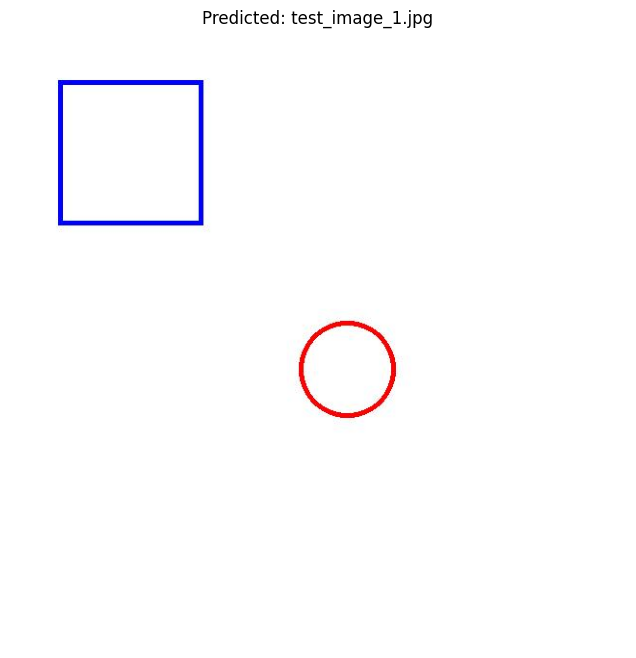

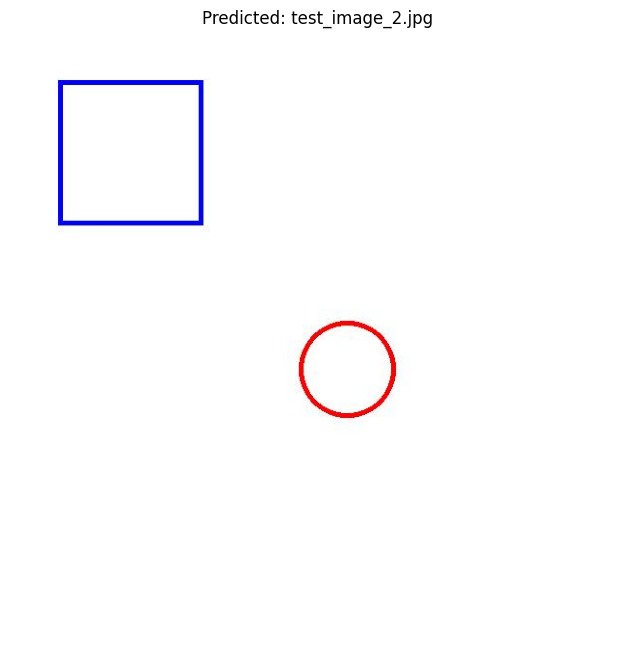

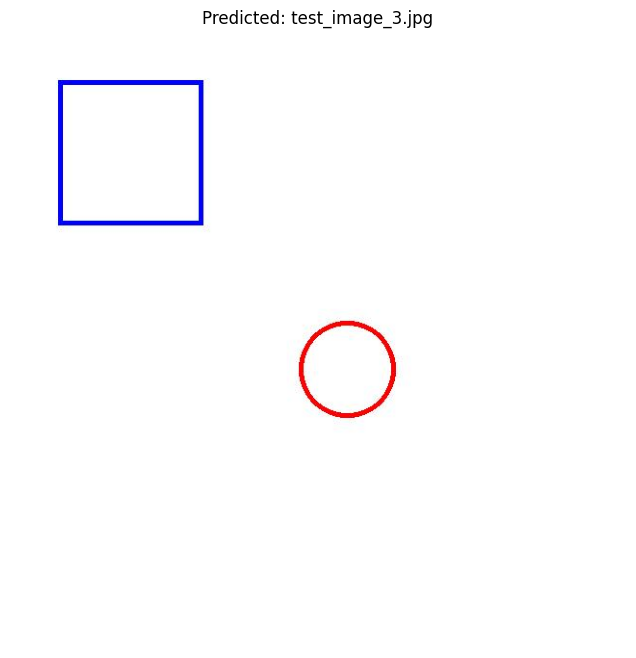

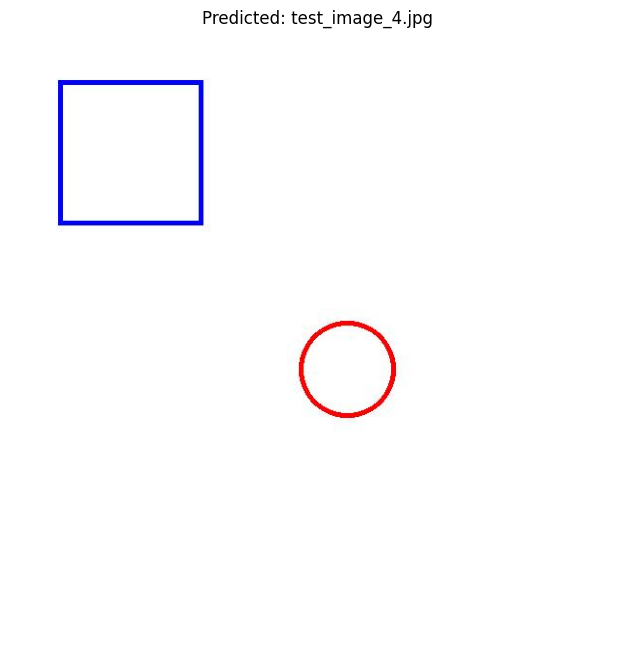

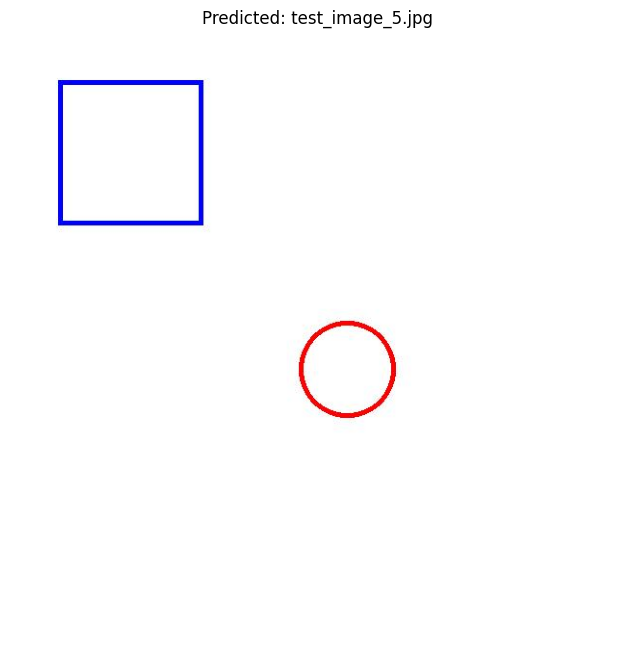

In [7]:
def evaluate_model(model, test_data_dir):
    """
    테스트 데이터를 사용하여 모델 평가를 수행합니다.
    
    Args:
        model: 학습된 YOLO 모델.
        test_data_dir: 테스트 데이터가 저장된 경로.
    
    Returns:
        predictions: 모델 예측 결과.
    """
    # 테스트 이미지 경로 로드
    test_images = [os.path.join(test_data_dir, img) for img in os.listdir(test_data_dir) if img.endswith(('.jpg', '.png'))]
    if not test_images:
        raise ValueError(f"테스트 데이터 폴더에 이미지 파일이 없습니다: {test_data_dir}")
    
    # 모델 예측
    results = model.predict(source=test_images, save=True)
    return results


def visualize_results(test_data_dir, results):
    """
    모델 예측 결과를 시각화합니다.
    
    Args:
        test_data_dir: 테스트 데이터 경로.
        results: 모델 예측 결과.
    """
    import matplotlib.pyplot as plt
    import cv2

    # Jupyter Notebook에서 시각화 설정
    %matplotlib inline

    for result in results:
        # YOLO가 저장한 결과 이미지 경로 가져오기
        output_img_path = result.path
        
        # 결과 이미지 로드
        output_img = cv2.imread(output_img_path)
        output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

        # 시각화
        plt.figure(figsize=(8, 8))
        plt.imshow(output_img)
        plt.axis("off")
        plt.title(f"Predicted: {os.path.basename(output_img_path)}")
        plt.show()


# 모델 경로 설정
model_path = os.path.join(model_save_dir, "artwork_training", "weights", "best.pt")
model = YOLO(model_path)

# 모델 평가 및 시각화 실행
try:
    predictions = evaluate_model(model, test_data_dir)
    print("모델 평가 완료.")
    visualize_results(test_data_dir, predictions)
except ValueError as e:
    print("오류 발생:", e)
